In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy
import seaborn as sns


SyntaxError: ignored

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!pip install keras-tuner --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.1 MB/s eta 0:00:00


In [3]:
df = pd.read_csv("/content/Housing.csv")

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

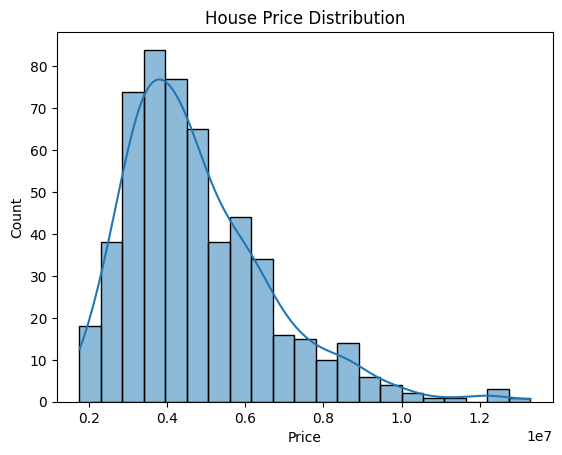

In [8]:
plt.figure
sns.histplot(df['price'], kde=True)
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.show()

<Axes: xlabel='airconditioning', ylabel='bedrooms'>

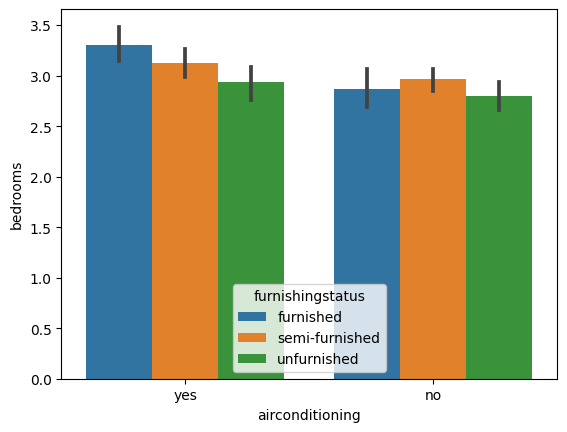

In [14]:
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])

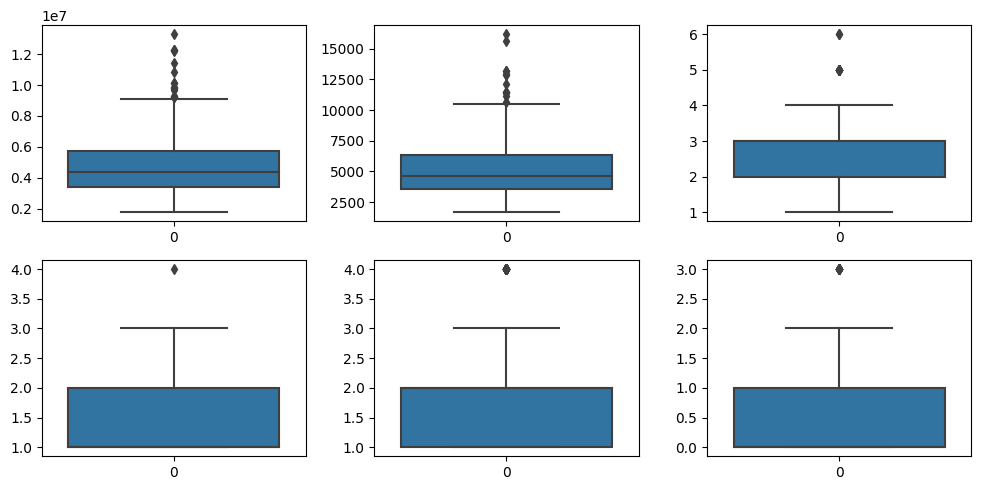

In [15]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

<Axes: xlabel='furnishingstatus', ylabel='price'>

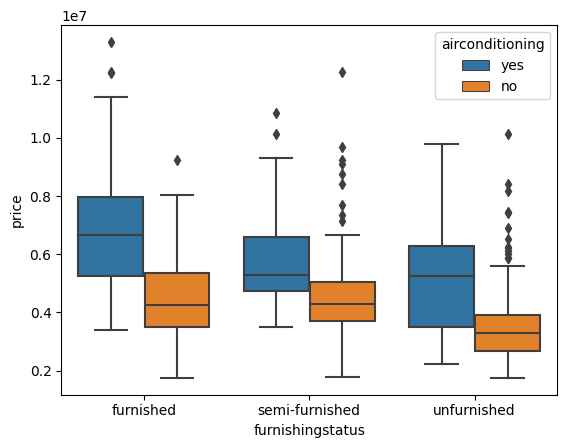

In [16]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

<Axes: xlabel='area', ylabel='price'>

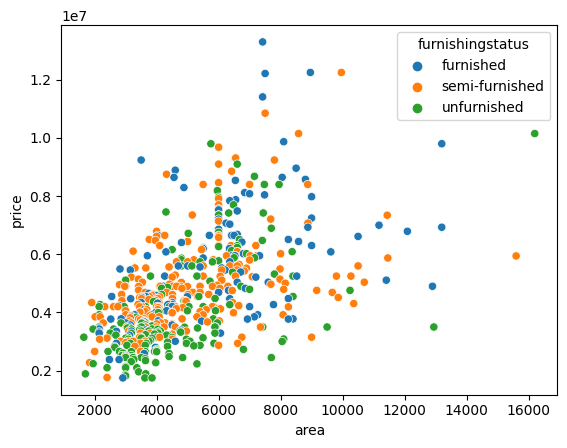

In [17]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

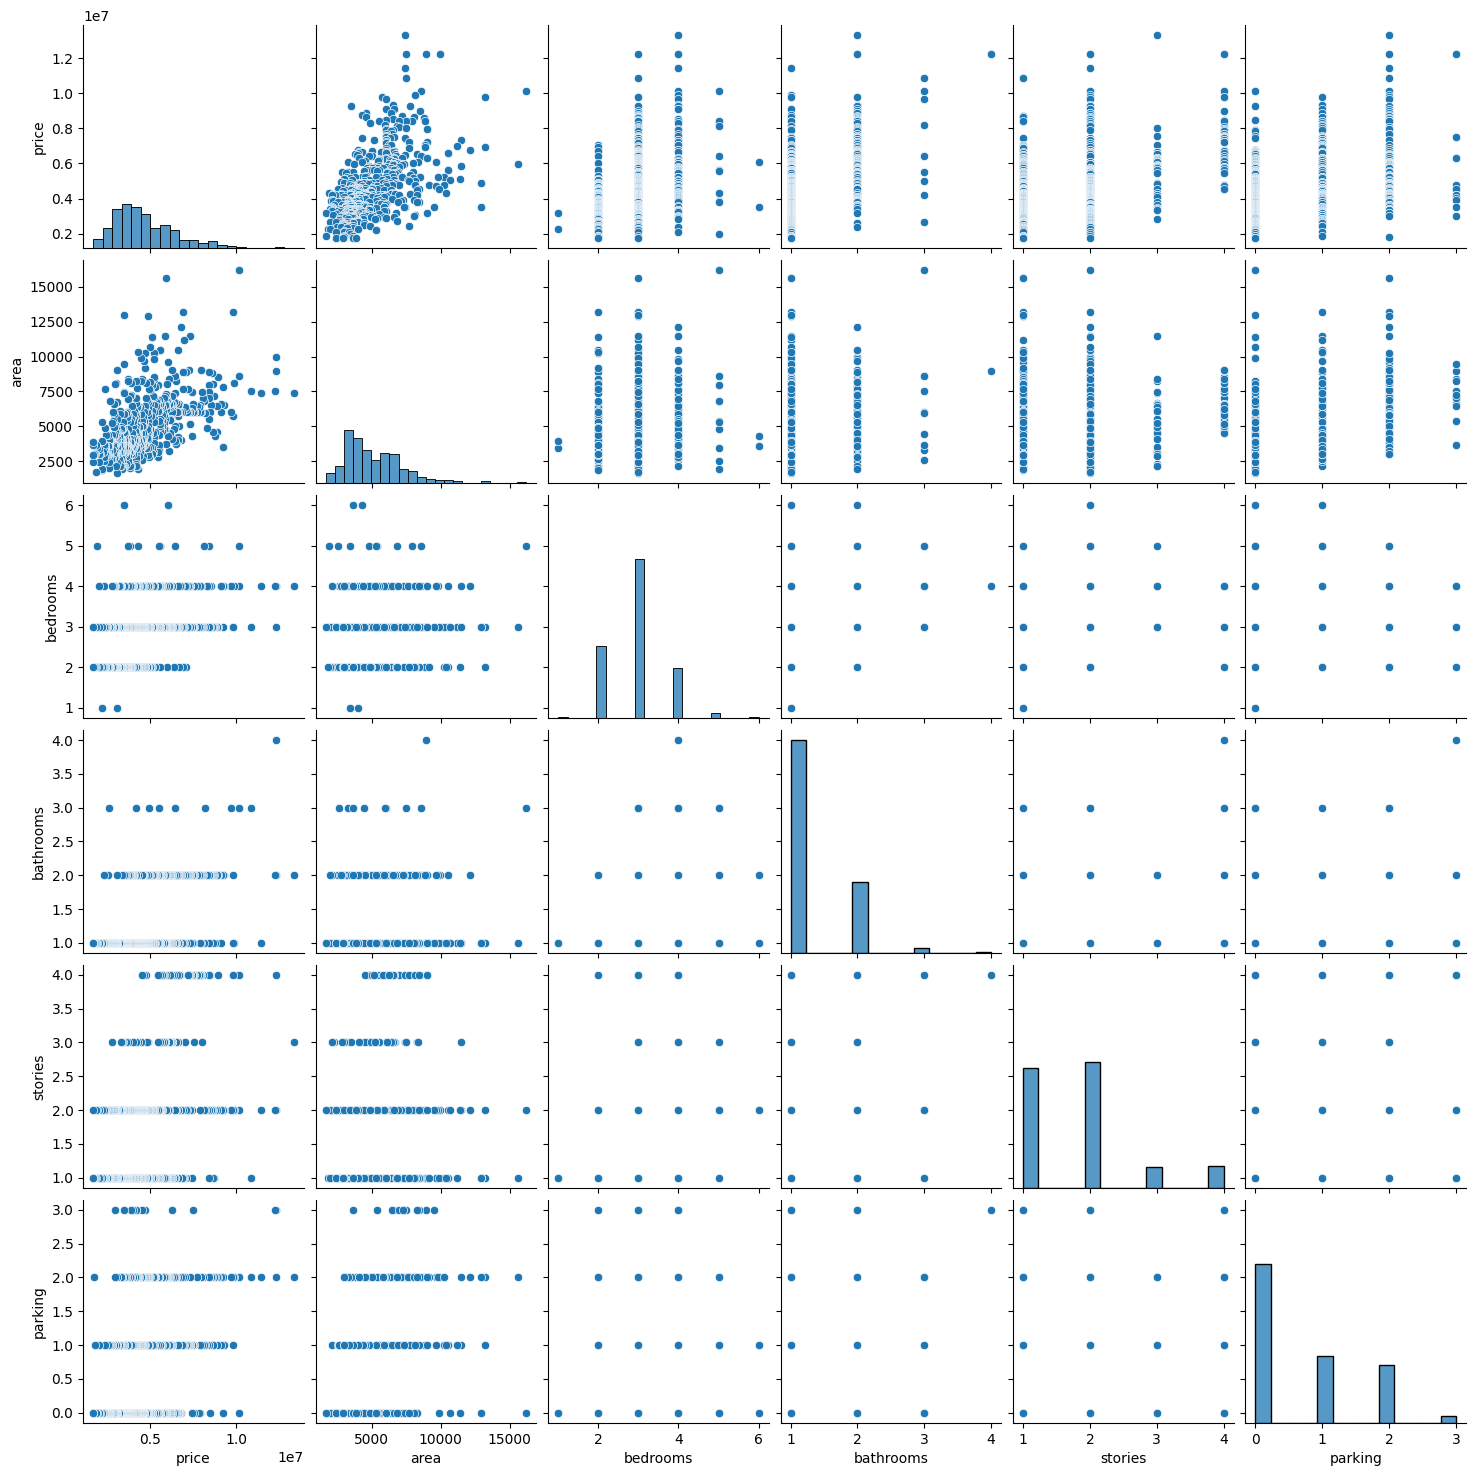

In [18]:
sns.pairplot(df)
plt.show()

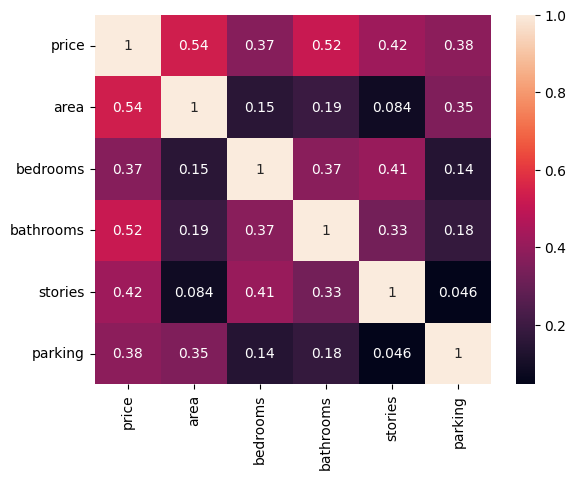

In [32]:
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.show()

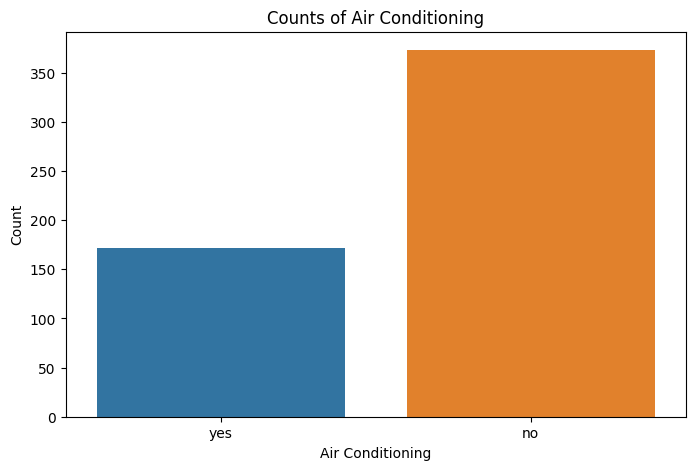

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='airconditioning', data=df)
plt.title('Counts of Air Conditioning')
plt.xlabel('Air Conditioning')
plt.ylabel('Count')
plt.show()

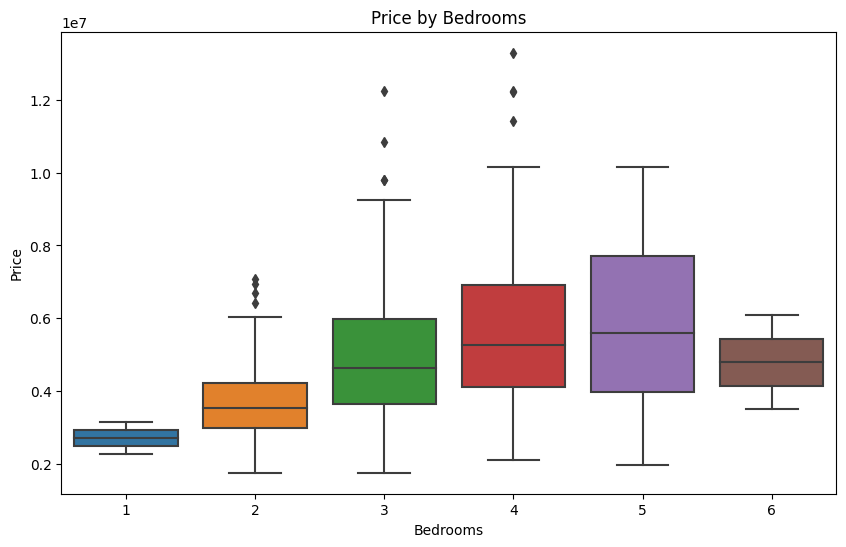

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

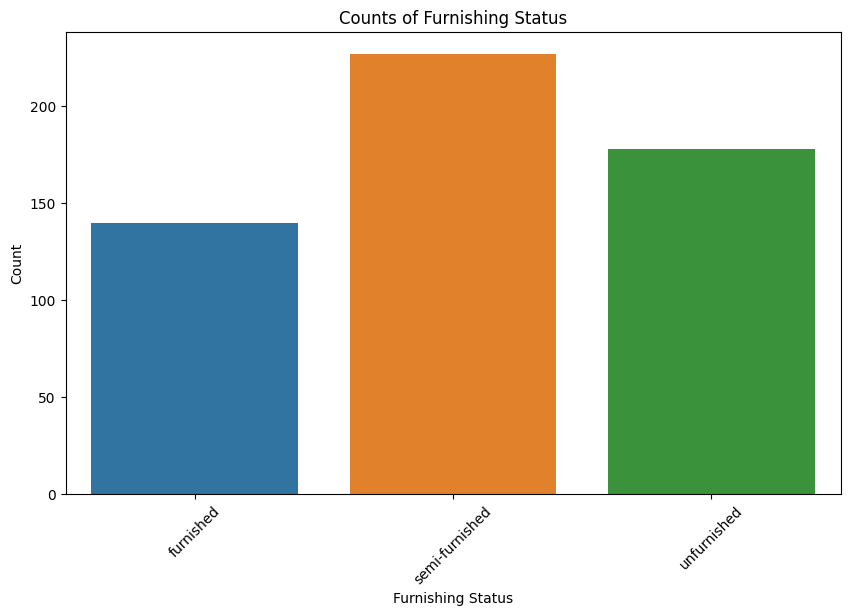

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='furnishingstatus', data=df)
plt.title('Counts of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

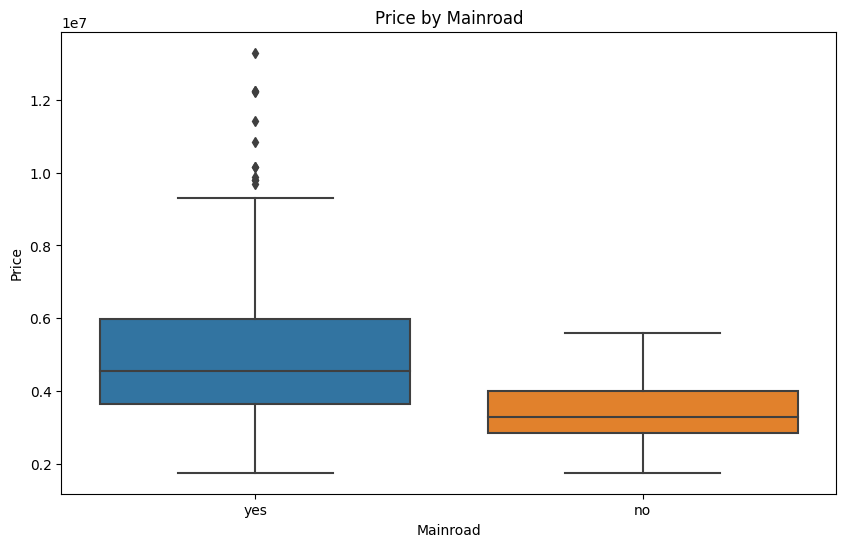

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mainroad', y='price', data=df)
plt.title('Price by Mainroad')
plt.xlabel('Mainroad')
plt.ylabel('Price')
plt.show()

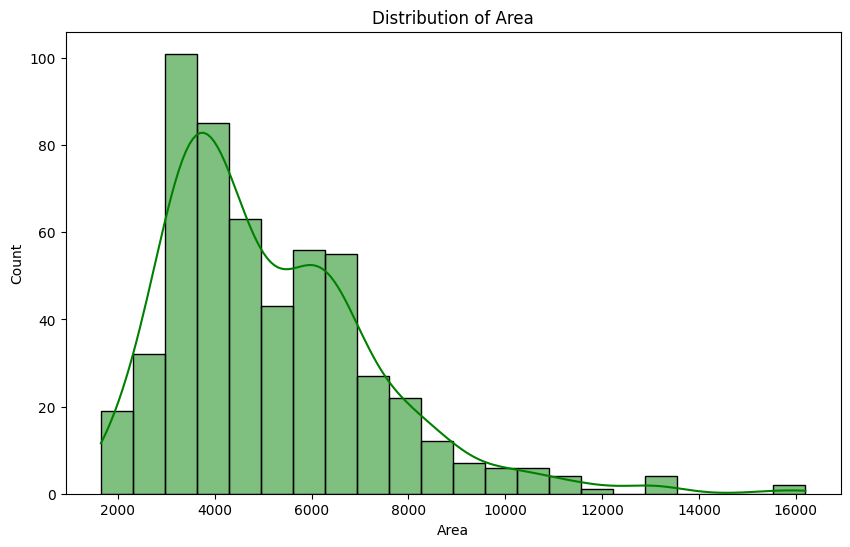

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['area'], kde=True, color='green')
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

In [35]:
encoded_data = pd.get_dummies( df,columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])
encoded_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

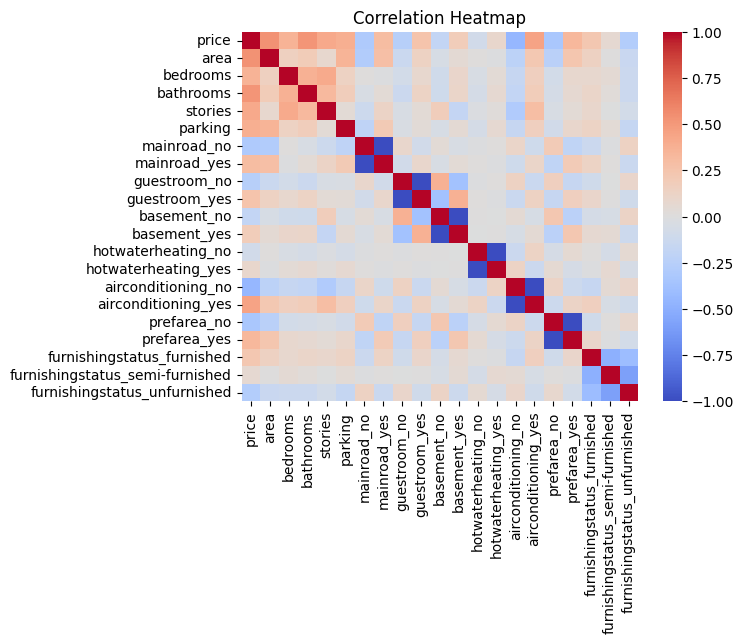

In [36]:
sns.heatmap(encoded_data.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [37]:
encoded_data.shape

(545, 21)

In [41]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_no                      545 non-null    uint8
 7   mainroad_yes                     545 non-null    uint8
 8   guestroom_no                     545 non-null    uint8
 9   guestroom_yes                    545 non-null    uint8
 10  basement_no                      545 non-null    uint8
 11  basement_yes                     545 non-null    uint8
 12  hotwaterheating_no               545 non-null    u

In [39]:
X = encoded_data.drop(['price'],axis=1)
Y = encoded_data['price']

In [44]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y,
test_size=0.2, random_state=100)

In [53]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(20,)))

    hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
    hp_activation1 = hp.Choice('activation1', values=['relu', 'tanh', 'sigmoid'])

    model.add(layers.Dense(units=hp_units1, activation=hp_activation1))

    hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
    hp_activation2 = hp.Choice('activation2', values=['relu', 'tanh', 'sigmoid'])

    model.add(layers.Dense(units=hp_units2, activation=hp_activation2))

    model.add(layers.Dense(1, activation='linear'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='mean_squared_error',
                  metrics=['mean_absolute_error'])

    return model

In [54]:
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=3,
    directory='my_dir',
    project_name='my_project'
)

In [55]:
tuner.search(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)

Trial 10 Complete [00h 00m 09s]
val_loss: 18442661571242.668

Best val_loss So Far: 18442661571242.668
Total elapsed time: 00h 01m 24s


In [56]:
tuner.results_summary()

Results summary
Results in my_dir/my_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 09 summary
Hyperparameters:
units1: 96
activation1: relu
units2: 352
activation2: relu
learning_rate: 0.01
Score: 18442661571242.668

Trial 03 summary
Hyperparameters:
units1: 320
activation1: sigmoid
units2: 96
activation2: relu
learning_rate: 0.001
Score: 25155327754240.0

Trial 08 summary
Hyperparameters:
units1: 384
activation1: tanh
units2: 128
activation2: tanh
learning_rate: 0.01
Score: 25157340321109.332

Trial 01 summary
Hyperparameters:
units1: 96
activation1: relu
units2: 32
activation2: relu
learning_rate: 0.001
Score: 25157928222720.0

Trial 07 summary
Hyperparameters:
units1: 160
activation1: sigmoid
units2: 96
activation2: sigmoid
learning_rate: 0.01
Score: 25157964573354.668

Trial 05 summary
Hyperparameters:
units1: 384
activation1: tanh
units2: 288
activation2: tanh
learning_rate: 0.001
Score: 25158270058496.0

Trial 00 summary
Hyperparameters:
units1

In [57]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
best_model.fit(X_train, Y_train, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
14/14 [==============================] - 1s 15ms/step - loss: 18418904334336.0000 - mean_absolute_error: 4046165.7500 - val_loss: 15382692757504.0000 - val_mean_absolute_error: 3694938.5000
Epoch 2/50
14/14 [==============================] - 0s 6ms/step - loss: 15971635953664.0000 - mean_absolute_error: 3770253.0000 - val_loss: 12866122940416.0000 - val_mean_absolute_error: 3364660.5000
Epoch 3/50
14/14 [==============================] - 0s 5ms/step - loss: 13421487587328.0000 - mean_absolute_error: 3440200.5000 - val_loss: 10575808561152.0000 - val_mean_absolute_error: 3005458.5000
Epoch 4/50
14/14 [==============================] - 0s 5ms/step - loss: 11103633408000.0000 - mean_absolute_error: 3094106.5000 - val_loss: 8659265388544.0000 - val_mean_absolute_error: 2671228.0000
Epoch 5/50
14/14 [==============================] - 0s 6ms/step - loss: 9125608030208.0000 - mean_absolute_error: 2764444.2500 - val_loss: 7296230359040.0000 - val_mean_absolute_error: 2413122.2500
Ep

In [59]:
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)
print(f'MAE: {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print(f'MSE: {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Calculate Root Mean Squared Logarithmic Error (RMSLE)
rmsle = mean_squared_log_error(Y_test, y_pred, squared=False)
print(f'RMSLE: {rmsle}')

# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(Y_test, y_pred)
print(f'R-squared (R2): {r2}')

4/4 [==============================] - 0s 3ms/step
MAE: 4650728.357798165
MSE: 25158755127441.367
RMSE: 5015850.389260167
RMSLE: 14.587722738763139
R-squared (R2): -6.128174385493444
